<a href="https://colab.research.google.com/github/pakeezah03/ML1/blob/main/Exp1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/foodtruck.txt')
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Population Vs Profit')

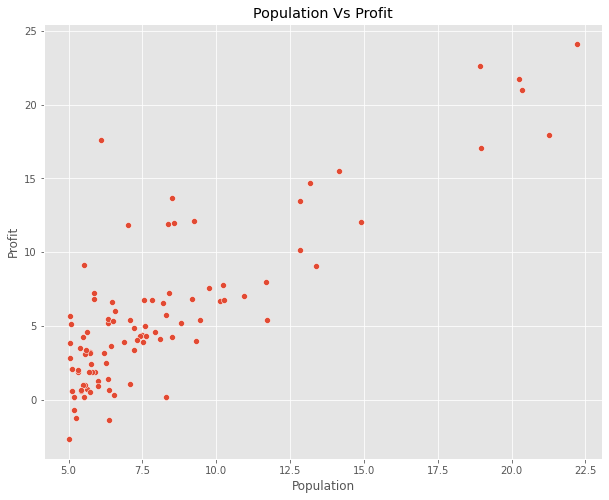

In [ ]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Population Vs Profit")

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/ (2*m) * np.sum(error)

In [ ]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape (m, 1)
theta = np.zeros((2, 1))

cost_function (X, y, theta)

32.072733877455676

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.9 + 1.19x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

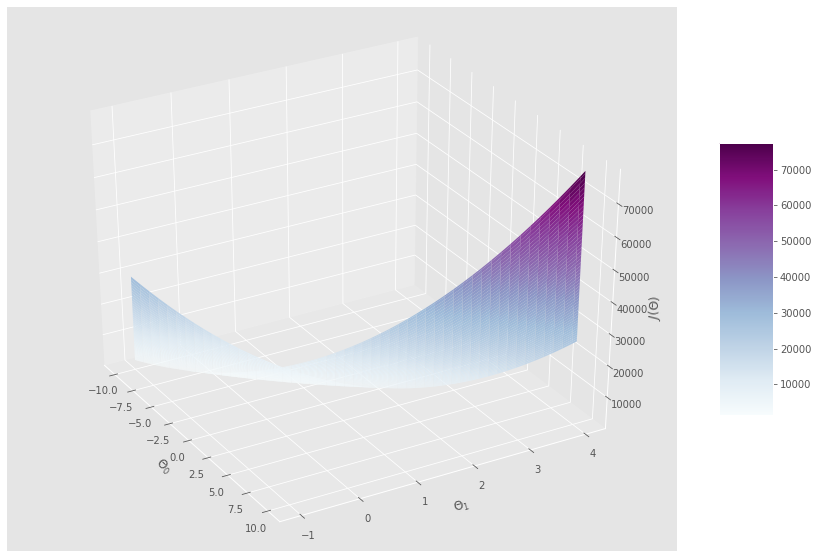

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values,cmap ='BuPu')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

ax.view_init(33, 330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

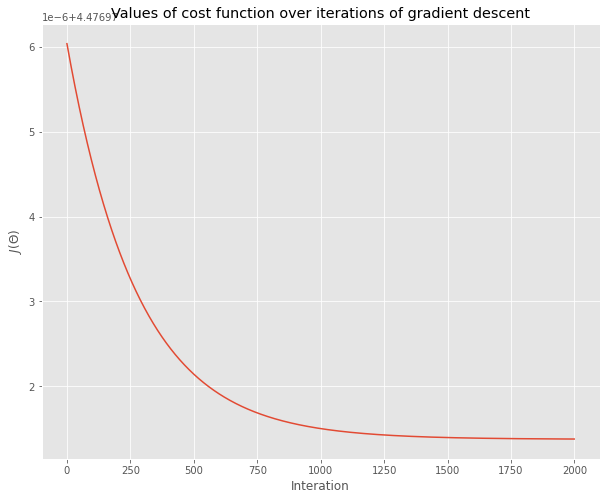

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[0.05839135],
       [0.6532885 ]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


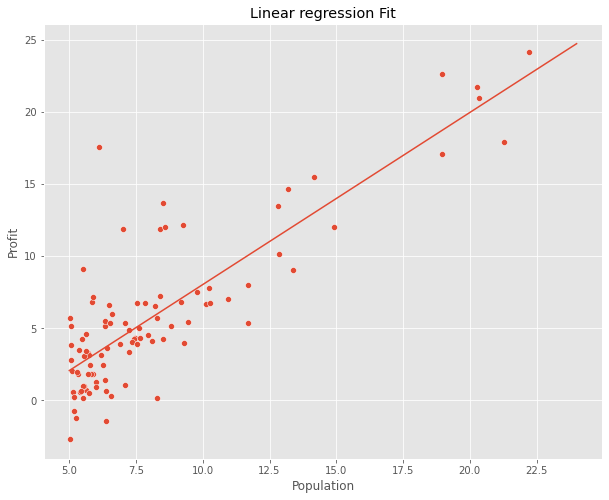

In [ ]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");

In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]), theta)*10000
y_pred_1


8764.698539013547

In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

60064.30637818955

In [ ]:
y_pred_3 = predict(np.array([1, 15]), theta)*10000
y_pred_3

139996.2534764405

In [ ]:
y_pred_4 = predict(np.array([1, 10]), theta)*10000
y_pred_4

80345.54668670097